<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM1_(4_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and visualizes prominent terms from the first IPCC "Mitigations" report published in 1990. The PDF of the report (a permanent link available [here](https://https://archive.ipcc.ch/publications_and_data/publications_ipcc_first_assessment_1990_wg3.shtml)) is 332 pages and therefore one of the smaller reports. I converted the PDF into a text file with the use of ABBY Fine Reader 14.**

## Cleaning
In this section, I clean the files for analysis. 

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [4]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [6]:
with open("/content/IPCC1M.txt", "r", encoding='utf-8') as text:
    IPCCM1= text.read()

In [7]:
MC1= IPCCM1.lower() # remove casing
MC2=MC1
print(MC2[:1000])

﻿climate change
7
the ipcc
world meteorological organization/united nations
environment program
intergovernmental panel on climate change
				>
				



climate change
the ipcc response strategies
climate c ii a n g e
the ipcc response strategies
world meteorological organization/united nations environment program
intergovernmental panel
on climate change
note to the reader
the report of the response strategies working group (rswg) was compiled through an unprecedented international cooperative effort to deal with the many climate change response strategies. the chairs of the four rswg subgroups and the coordinators of the five rswg topic areas took the responsibility for completing their individual reports. along with their respective governments, they contributed generously of their time and resources to that end.
it was not possible or intended to review each subgroup report and topic paper in plenary session. the rswg report thus constitutes a series of independently prepared underl

In [8]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [9]:
MC4=remove_Stopwords(MC3)

In [10]:
MC5=lemmatize_text(MC4)

In [11]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [12]:
IPCCM1_words= MC6.split()
print('Number of words in IPCCM1:',len(IPCCM1_words))

Number of words in IPCCM1: 83365


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]

print(MC7)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['\ufeffclimate', 'change', '7', 'ipcc', 'world', 'meteorological', 'organizationunited', 'nation', 'environment', 'program', 'intergovernmental', 'panel', 'climate', 'change', 'climate', 'change', 'ipcc', 'response', 'strategy', 'climate', 'c', 'ii', 'n', 'g', 'e', 'ipcc', 'response', 'strategy', 'world', 'meteorological', 'organizationunited', 'nation', 'environment', 'program', 'intergovernmental', 'panel', 'climate', 'change', 'note', 'reader', 'report', 'response', 'strategy', 'working', 'group', 'rswg', 'compiled', 'unprecedented', 'international', 'cooperative', 'effort', 'deal', 'many', 'climate', 'change', 'response', 'strategy', 'chair', 'four', 'rswg', 'subgroup', 'coordinator', 'five', 'rswg', 'topic', 'area', 'took', 'responsibility', 'completing', 'individual', 'report', 'along', 'respective', 'government', 'contributed', 'generously', 'time', 'resource',

In [14]:
MC8= [word for word in MC7 if word.isalnum()] # need to join this
print(MC8)

['change', '7', 'ipcc', 'world', 'meteorological', 'organizationunited', 'nation', 'environment', 'program', 'intergovernmental', 'panel', 'climate', 'change', 'climate', 'change', 'ipcc', 'response', 'strategy', 'climate', 'c', 'ii', 'n', 'g', 'e', 'ipcc', 'response', 'strategy', 'world', 'meteorological', 'organizationunited', 'nation', 'environment', 'program', 'intergovernmental', 'panel', 'climate', 'change', 'note', 'reader', 'report', 'response', 'strategy', 'working', 'group', 'rswg', 'compiled', 'unprecedented', 'international', 'cooperative', 'effort', 'deal', 'many', 'climate', 'change', 'response', 'strategy', 'chair', 'four', 'rswg', 'subgroup', 'coordinator', 'five', 'rswg', 'topic', 'area', 'took', 'responsibility', 'completing', 'individual', 'report', 'along', 'respective', 'government', 'contributed', 'generously', 'time', 'resource', 'end', 'possible', 'intended', 'review', 'subgroup', 'report', 'topic', 'paper', 'plenary', 'session', 'rswg', 'report', 'thus', 'const

In [15]:
MC9=[x for x in MC8 if not (x.isdigit() 
                            or x[0] == '-' and x[1:].isdigit())] # good for eliminating numbers

In [16]:
from nltk import FreqDist
freq = FreqDist(MC9)
print(freq.most_common(100))

[('emission', 1144), ('change', 875), ('climate', 767), ('country', 564), ('forest', 528), ('gas', 487), ('may', 485), ('use', 477), ('energy', 463), ('response', 455), ('resource', 429), ('greenhouse', 427), ('economic', 407), ('could', 393), ('measure', 391), ('level', 390), ('development', 389), ('option', 383), ('area', 375), ('strategy', 367), ('technology', 351), ('scenario', 350), ('management', 339), ('would', 338), ('developing', 321), ('policy', 316), ('coastal', 298), ('percent', 298), ('land', 298), ('global', 290), ('impact', 289), ('group', 280), ('carbon', 280), ('need', 275), ('cost', 275), ('international', 264), ('also', 262), ('water', 259), ('system', 254), ('increase', 242), ('report', 229), ('growth', 218), ('working', 216), ('co2', 214), ('source', 212), ('information', 208), ('agricultural', 207), ('ipcc', 203), ('effect', 200), ('activity', 199), ('forestry', 195), ('rate', 195), ('agriculture', 193), ('sea', 193), ('new', 190), ('environmental', 189), ('reduce

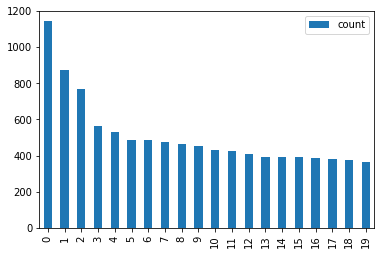

In [17]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [18]:
print(df)

           word  count
0      emission   1144
1        change    875
2       climate    767
3       country    564
4        forest    528
5           gas    487
6           may    485
7           use    477
8        energy    463
9      response    455
10     resource    429
11   greenhouse    427
12     economic    407
13        could    393
14      measure    391
15        level    390
16  development    389
17       option    383
18         area    375
19     strategy    367


In [19]:
MC11=freq.most_common(100)
MC11

[('emission', 1144),
 ('change', 875),
 ('climate', 767),
 ('country', 564),
 ('forest', 528),
 ('gas', 487),
 ('may', 485),
 ('use', 477),
 ('energy', 463),
 ('response', 455),
 ('resource', 429),
 ('greenhouse', 427),
 ('economic', 407),
 ('could', 393),
 ('measure', 391),
 ('level', 390),
 ('development', 389),
 ('option', 383),
 ('area', 375),
 ('strategy', 367),
 ('technology', 351),
 ('scenario', 350),
 ('management', 339),
 ('would', 338),
 ('developing', 321),
 ('policy', 316),
 ('coastal', 298),
 ('percent', 298),
 ('land', 298),
 ('global', 290),
 ('impact', 289),
 ('group', 280),
 ('carbon', 280),
 ('need', 275),
 ('cost', 275),
 ('international', 264),
 ('also', 262),
 ('water', 259),
 ('system', 254),
 ('increase', 242),
 ('report', 229),
 ('growth', 218),
 ('working', 216),
 ('co2', 214),
 ('source', 212),
 ('information', 208),
 ('agricultural', 207),
 ('ipcc', 203),
 ('effect', 200),
 ('activity', 199),
 ('forestry', 195),
 ('rate', 195),
 ('agriculture', 193),
 ('sea',

In [20]:
MC11[-15:]

[('transfer', 140),
 ('high', 140),
 ('reduction', 137),
 ('action', 136),
 ('nation', 134),
 ('social', 133),
 ('including', 131),
 ('many', 129),
 ('one', 128),
 ('convention', 127),
 ('case', 127),
 ('supply', 126),
 ('result', 125),
 ('factor', 125),
 ('appropriate', 123)]

In [23]:
MC10=','.join(MC9)
print(MC10)

change,ipcc,world,meteorological,organizationunited,nation,environment,program,intergovernmental,panel,climate,change,climate,change,ipcc,response,strategy,climate,c,ii,n,g,e,ipcc,response,strategy,world,meteorological,organizationunited,nation,environment,program,intergovernmental,panel,climate,change,note,reader,report,response,strategy,working,group,rswg,compiled,unprecedented,international,cooperative,effort,deal,many,climate,change,response,strategy,chair,four,rswg,subgroup,coordinator,five,rswg,topic,area,took,responsibility,completing,individual,report,along,respective,government,contributed,generously,time,resource,end,possible,intended,review,subgroup,report,topic,paper,plenary,session,rswg,report,thus,constitutes,series,independently,prepared,underlying,document,attempt,analyze,thoroughly,possible,issue,addressed,subgroup,topic,area,synthesis,concept,underlying,report,rswg,policymakers,summary,consensus,reached,rswg,third,plenary,session,geneva,june,b,intergovernmental,panel,

In [24]:
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC10}) 
df

,author,report
0,IPCC,"change,ipcc,world,meteorological,organizationu..."


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

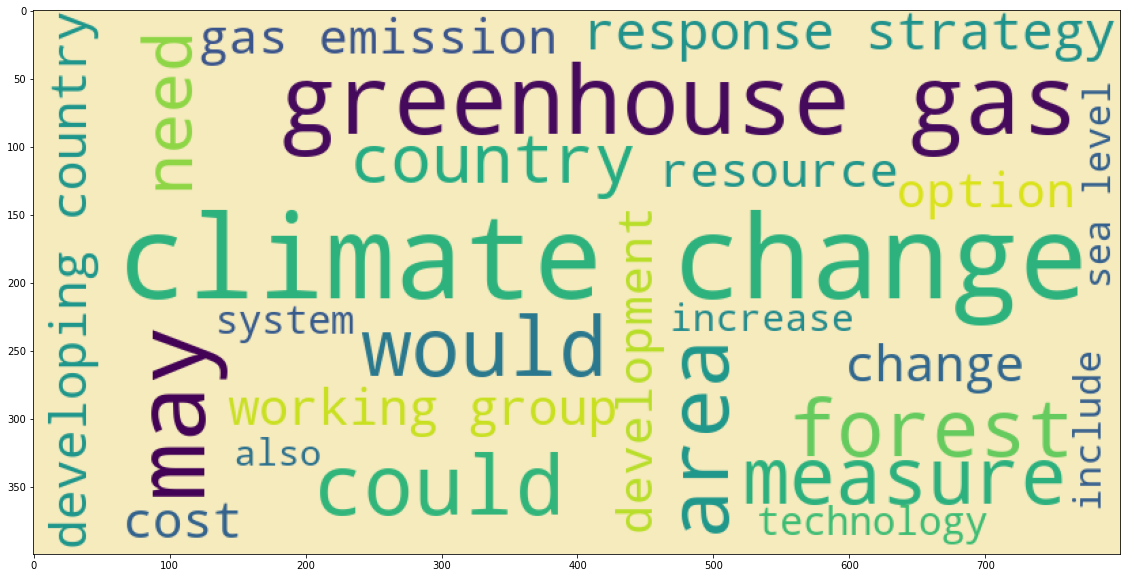

In [26]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["emission," "emissions"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing climate change

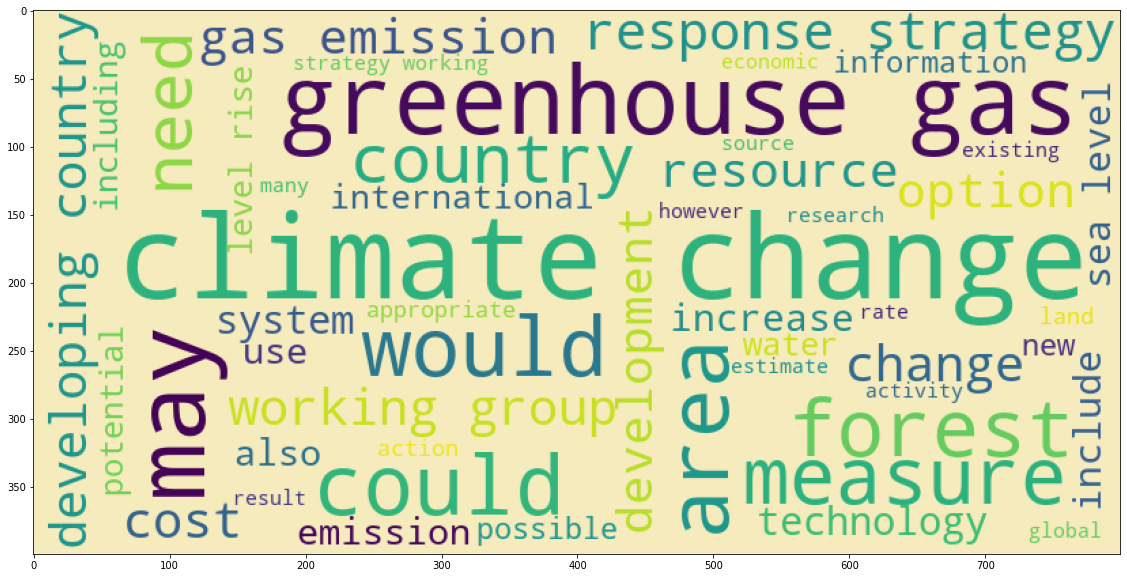

In [27]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=50, width=800, height=400,random_state=30,stopwords=[]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud);

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

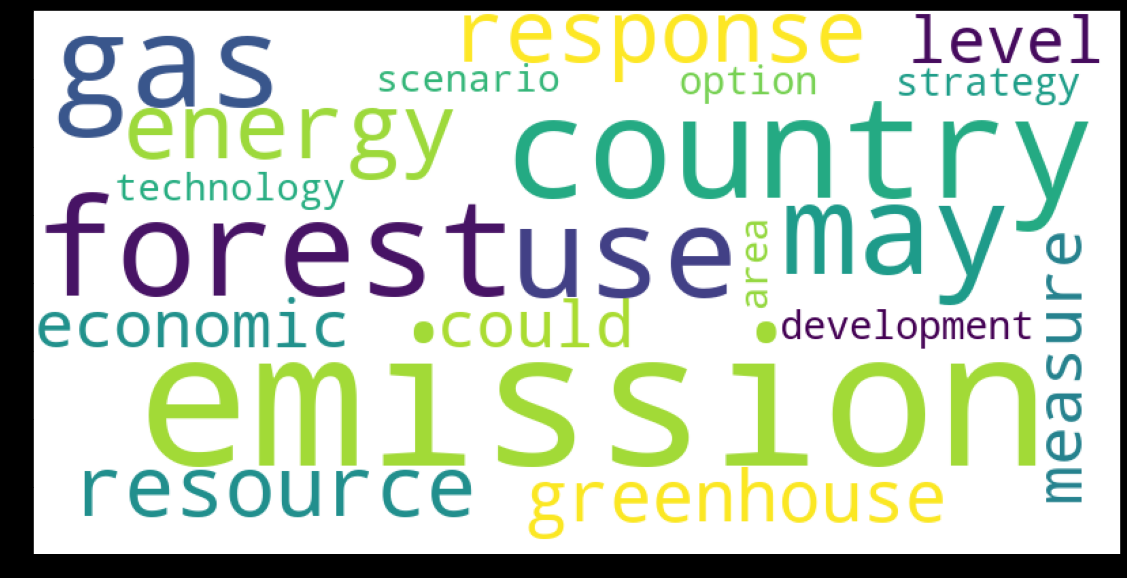

In [28]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=["climate", "change"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and select stopwords

In [ ]:
occurrences = MC9.count("climate")
print("Number of times the word \'climate\' appears:", occurrences)